# CS 513 - Knowledge Discovery and Data Mining: Final Project

In [130]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Preprocessing - 

In [131]:
df = pd.read_csv('attrition_data.csv')
# print(df.columns)
#Exited people (1 or 0)
y = df['STATUS'].values
df.head()

EMP_ID  ANNUAL_RATE  HRLY_RATE  JOBCODE ETHNICITY SEX MARITAL_STATUS  \
0  3285941608        33615         22    71850     BLACK   F       Divorced   
1  3687079832        70675         40    59806     ASIAN   M         Single   
2  7209970080        34320         23    60311     WHITE   F         Single   
3  9084013977       103199         59    16233     ASIAN   F         Single   
4  4566148978       141801         71    64415     ASIAN   F         Single   

   JOB_SATISFACTION  AGE NUMBER_OF_TEAM_CHANGED  ... DISABLED_EMP  \
0                 4   35                     3+  ...            N   
1                 3   18                     3+  ...            N   
2                 5   18                      2  ...            N   
3                 2   50                      0  ...            N   
4                 4   34                      3  ...            N   

  DISABLED_VET  EDUCATION_LEVEL  STATUS                       JOB_GROUP  \
0            N          LEVEL 2       T  Plant & Facilities Maintenance   
1            N          LEVEL 1       A                   Customer Care   
2            N          LEVEL 1       A                   Customer Care   
3            N          LEVEL 1       T                         Finance   
4            N          LEVEL 1       A              Marketing - Direct   

  PREVYR_1  PREVYR_2 PREVYR_3 PREVYR_4 PREVYR_5  
0        0         0        0        0        0  
1        3         3        3        2        3  
2        3         3        3        2        3  
3        0         0        0        0        0  
4        2         2        2        2        2  

[5 rows x 27 columns]

In [132]:
# Check Missing Values
print(df.isnull().sum())

#Drop irrelevant columns - 
df = df.drop(columns="STATUS")
df = df.drop(columns="EMP_ID")
df = df.drop(columns="JOBCODE")
df = df.drop(columns="TERMINATION_YEAR")

df = df.drop(columns="PREVYR_1")
df = df.drop(columns="PREVYR_2")
df = df.drop(columns="PREVYR_3")
df = df.drop(columns="PREVYR_4")
df = df.drop(columns="PREVYR_5")

#Fill missing values with 0s - 
df = df.fillna(0)

EMP_ID                       0
ANNUAL_RATE                  0
HRLY_RATE                    0
JOBCODE                      0
ETHNICITY                    0
SEX                          0
MARITAL_STATUS               0
JOB_SATISFACTION             0
AGE                          0
NUMBER_OF_TEAM_CHANGED       0
REFERRAL_SOURCE            445
HIRE_MONTH                   0
REHIRE                       0
TERMINATION_YEAR          5394
IS_FIRST_JOB                 0
TRAVELLED_REQUIRED           0
PERFORMANCE_RATING           0
DISABLED_EMP                 0
DISABLED_VET                 0
EDUCATION_LEVEL              0
STATUS                       0
JOB_GROUP                    0
PREVYR_1                     0
PREVYR_2                     0
PREVYR_3                     0
PREVYR_4                     0
PREVYR_5                     0
dtype: int64


## Dataset Summary - 

In [133]:
df.describe()

ANNUAL_RATE    HRLY_RATE  JOB_SATISFACTION          AGE  \
count  9.612000e+03  9612.000000       9612.000000  9612.000000   
mean   8.938563e+04    49.953808          2.757491    40.151581   
std    5.843344e+04    28.148113          1.411257    13.664378   
min    1.678600e+04    14.000000          1.000000    18.000000   
25%    5.085550e+04    32.000000          2.000000    28.000000   
50%    7.421050e+04    43.000000          3.000000    39.000000   
75%    1.088115e+05    59.000000          4.000000    52.000000   
max    1.250924e+06   608.000000          5.000000    64.000000   

       PERFORMANCE_RATING  
count         9612.000000  
mean             3.002081  
std              1.406909  
min              1.000000  
25%              2.000000  
50%              3.000000  
75%              4.000000  
max              5.000000

In [101]:
X = df.values
X.shape

(9612, 18)

## Label Encoding - 

In [102]:
labelencoder_X_1 = LabelEncoder()
# X = labelencoder_X_1.fit_transform(X)
#X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])
X[:, 4] = labelencoder_X_1.fit_transform(X[:, 4])
#X[:, 6] = labelencoder_X_1.fit_transform(X[:, 6])
X[:, 7] = labelencoder_X_1.fit_transform(X[:, 7])
X[:, 8] = labelencoder_X_1.fit_transform(X[:, 8].astype(str))
X[:, 9] = labelencoder_X_1.fit_transform(X[:, 9])
X[:, 10] = labelencoder_X_1.fit_transform(X[:, 10])
X[:, 11] = labelencoder_X_1.fit_transform(X[:, 11])
X[:, 12] = labelencoder_X_1.fit_transform(X[:, 12])
#X[:, 13] = labelencoder_X_1.fit_transform(X[:, 13])
X[:, 14] = labelencoder_X_1.fit_transform(X[:, 14])
X[:, 15] = labelencoder_X_1.fit_transform(X[:, 15])
X[:, 16] = labelencoder_X_1.fit_transform(X[:, 16])
X[:, 17] = labelencoder_X_1.fit_transform(X[:, 17])
#X[:, 18] = labelencoder_X_1.fit_transform(X[:, 18])

In [103]:
X[0]

array([33615, 22, 3, 0, 0, 4, 35, 4, 2, 6, 0, 0, 0, 4, 0, 0, 1, 44],
      dtype=object)

In [104]:
labelencoder_y_1 = LabelEncoder()
y = labelencoder_y_1.fit_transform(y)

# Splitting the dataset -

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [106]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(7689, 18)

# Gaussian Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
classifier = GNB.fit(X_train,y_train)
GNB_pred = GNB.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, GNB_pred))

Gaussian Naive Bayes Accuracy: 0.5444617784711389


In [108]:
# Making the Confusion Matrix
import pandas as pd
confusion_matrix_attrition = pd.crosstab(y_test, GNB_pred, rownames=['Actual'], colnames=['Predicted'])
print("Gaussian Naive Bayes Confusion Matrix:\n")
print(confusion_matrix_attrition)
print("\nGaussian Naive Bayes Accuracy:", accuracy_score(y_test, GNB_pred))

Gaussian Naive Bayes Confusion Matrix:

Predicted    0    1
Actual             
0          366  720
1          156  681

Gaussian Naive Bayes Accuracy: 0.5444617784711389


# Random Forest Classifier - 

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.6640665626625065


In [110]:
# Making the Confusion Matrix
import pandas as pd
from sklearn.metrics import confusion_matrix
confusion_matrix_attrition = pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'])
print("Random Forest Confusion Matrix:\n")
print(confusion_matrix_attrition)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Confusion Matrix:

Predicted    0    1
Actual             
0          854  232
1          414  423

Random Forest Accuracy: 0.6640665626625065


# K nearest Neighbors

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 0.5574622984919396


In [112]:
# Making the Confusion Matrix
import pandas as pd
from sklearn.metrics import confusion_matrix
confusion_matrix_attrition = pd.crosstab(y_test, knn_pred, rownames=['Actual'], colnames=['Predicted'])
print("K-Nearest Neighbors Confusion Matrix:\n")
print(confusion_matrix_attrition)
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))

K-Nearest Neighbors Confusion Matrix:

Predicted    0    1
Actual             
0          719  367
1          484  353

K-Nearest Neighbors Accuracy: 0.5574622984919396


# Decision Tree - 

In [113]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred))

Decision Tree Accuracy: 0.62402496099844


In [37]:
# Plot and save decision tree 
# conda install python-graphviz
import graphviz 
dot_data = export_graphviz(dtree, out_file=None,  
                      class_names=['Successfull', 'Failed'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("D_tree") 
graph

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_attrition = pd.crosstab(y_test,dtree_pred, rownames=['Actual'], colnames=['Predicted'])
print("Decision Tree Confusion Matrix:\n")
print(confusion_matrix_attrition)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dtree_pred))

Decision Tree Confusion Matrix:

Predicted    0    1
Actual             
0          704  382
1          341  496

Decision Tree Accuracy: 0.62402496099844


# ANN - 

In [115]:
# Importing Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Initialising the ANN
classifier = Sequential()

# Add input layer and hidden layer no.1
# 6 output nodes, Relu activation function and 11 input nodes
# Output nodes is determined by the number of input nodes+1/2 (6)
# the uniform method makes sure the weights are given randomly with small numbers close to 0
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu', input_dim = 18))

# Add the second hidden layer to achieve a deep neural network
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, input_shape=(9,)))

# Add the third hidden layer to achieve a deep neural network
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, input_shape=(9,)))

# Add the Output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


#Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
classifier.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy']) 


history = classifier.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_data=(X_test, y_test))

# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Create a treshold to predict a true or false for leaving the
# the bank.
y_pred = (y_pred > 0.5)

/Users/neilsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=9, kernel_initializer="uniform")`
  del sys.path[0]
/Users/neilsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
  app.launch_new_instance()
/Users/neilsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
/Users/neilsharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


Train on 7689 samples, validate on 1923 samples
Epoch 1/50
7689/7689 [==============================] - 1s 159us/step - loss: 0.6770 - acc: 0.5596 - val_loss: 0.6691 - val_acc: 0.5647
Epoch 2/50
7689/7689 [==============================] - 1s 75us/step - loss: 0.6734 - acc: 0.5603 - val_loss: 0.6708 - val_acc: 0.5647
Epoch 3/50
7689/7689 [==============================] - 1s 75us/step - loss: 0.6717 - acc: 0.5600 - val_loss: 0.6694 - val_acc: 0.5647
Epoch 4/50
7689/7689 [==============================] - 1s 75us/step - loss: 0.6700 - acc: 0.5590 - val_loss: 0.6694 - val_acc: 0.5866
Epoch 5/50
7689/7689 [==============================] - 1s 82us/step - loss: 0.6696 - acc: 0.5712 - val_loss: 0.6679 - val_acc: 0.5803
Epoch 6/50
7689/7689 [==============================] - 1s 80us/step - loss: 0.6697 - acc: 0.5837 - val_loss: 0.6697 - val_acc: 0.5783
Epoch 7/50
7689/7689 [==============================] - 1s 75us/step - loss: 0.6662 - acc: 0.5915 - val_loss: 0.6693 - val_acc: 0.5819
Epoch 

In [116]:
print("Artificial Neural Network Accuracy:", accuracy_score(y_test, y_pred.round()))
y_pred = y_pred[:, 0]

Artificial Neural Network Accuracy: 0.5709828393135725


In [117]:
score = classifier.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#confusion_matrix_attrition = confusion_matrix(y_test, y_pred)
#print(confusion_matrix_attrition)
confusion_matrix_attrition = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("Artificial Neural Network Matrix:\n")
print(confusion_matrix_attrition)
print("\nArtificial Neural Network Accuracy:", accuracy_score(y_test, y_pred.round()))

1923/1923 [==============================] - 0s 22us/step
Test loss: 0.6754593223999765
Test accuracy: 0.5709828393445682
Artificial Neural Network Matrix:

Predicted  False  True 
Actual                 
0            645    441
1            384    453

Artificial Neural Network Accuracy: 0.5709828393135725


# Plotting ANN results - 

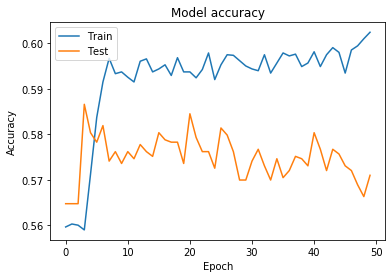

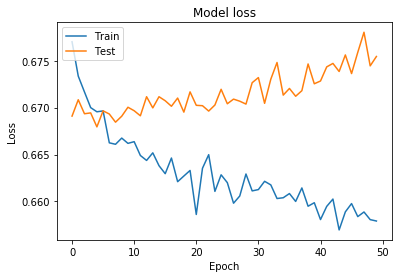

In [118]:
#Plotting the model - 
from keras.utils import plot_model
plot_model(classifier, to_file='model.png')



# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# SVM - 

In [119]:
from sklearn.svm import LinearSVC, SVC
svm = LinearSVC(C=0.8)
model = svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print("Support Vector Machines Assuracy:", accuracy_score(y_test, svm_pred))

Support Vector Machines Assuracy: 0.5891835673426937


/Users/neilsharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [122]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#confusion_matrix_attrition = confusion_matrix(y_test, y_pred)
#print(confusion_matrix_attrition)

confusion_matrix_attrition = pd.crosstab(y_test,svm_pred, rownames=['Actual'], colnames=['Predicted'])
print("Support Vector Machines Matrix:\n")
print(confusion_matrix_attrition)
print("\nSupport Vector Machines Accuracy:", accuracy_score(y_test, svm_pred))


Support Vector Machines Matrix:

Predicted    0    1
Actual             
0          847  239
1          551  286

Support Vector Machines Accuracy: 0.5891835673426937


# Final Results - 

In [121]:
pd.DataFrame([
        {"Model": "Gaussian Naive Bayes",      "Accuracy":  accuracy_score(y_test, GNB_pred)},
        {"Model": "Random Forest Classifier",  "Accuracy":  accuracy_score(y_test, rf_pred)},
        {"Model": "K-nearest Neighbors",       "Accuracy":  accuracy_score(y_test, knn_pred)},
        {"Model": "Decision Tree Classifier",  "Accuracy":  accuracy_score(y_test, dtree_pred)},
        {"Model": "Artificial Neural Network", "Accuracy":  accuracy_score(y_test, y_pred.round())},
        {"Model": "Support Vector Machines", "Accuracy":  accuracy_score(y_test, svm_pred)}
    ], index=range(1, 7))

Model  Accuracy
1       Gaussian Naive Bayes  0.544462
2   Random Forest Classifier  0.664067
3        K-nearest Neighbors  0.557462
4   Decision Tree Classifier  0.624025
5  Artificial Neural Network  0.570983
6    Support Vector Machines  0.589184